In [1]:
#
# Last executed on Nike at 18.03.21.
#

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import np_utils
from tensorflow.python.keras.layers import Input, Dense
from tensorflow.python.keras.models import Model
import tensorflow as tf
from sklearn.metrics import roc_auc_score
#np.random.seed(35)

Using TensorFlow backend.


In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)
print(np.min(X_train))
print(np.max(X_train))

X_train original shape (50000, 32, 32, 3)
y_train original shape (50000, 1)
X_test original shape (10000, 32, 32, 3)
y_test original shape (10000, 1)
0
255


In [4]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


/root/.local/lib/python3.7/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[6]')

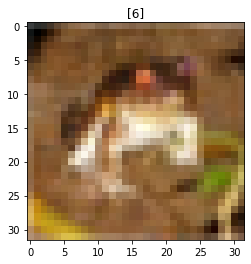

In [5]:
plt.imshow(X_train[0], cmap='gray')
plt.title(y_train[0])

In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train/=255
X_test/=255 

In [7]:
number_of_classes = 10

Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

y_train[0], Y_train[0]

(array([6], dtype=uint8),
 array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32))

In [8]:
input_shape = (32, 32, 3)
def createModel():
    input_img = Input(shape=input_shape)
    x = tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu')(input_img)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x) 
    x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu')(x)    
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)    
    x = tf.keras.layers.Dropout(0.5)(x)    
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(256, activation='relu')(x)    
    output = tf.keras.layers.Dense(10, activation='softmax', name='visualized_layer')(x)

    def auc(y_true, y_pred):
        return tf.py_function(roc_auc_score, (y_true, y_pred), tf.double)
    
    model = Model(inputs=input_img, outputs=output)
    return model

In [9]:
model = createModel()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
size = int(len(X_train) * 0.8)

train_x, val_x = X_train[:size], X_train[size:]
train_y, val_y = Y_train[:size], Y_train[size:]

In [11]:
with tf.device('/cpu:0'):
    history = model.fit(train_x, train_y, batch_size=128, nb_epoch=100, validation_data=(val_x, val_y))

Train on 40000 samples, validate on 10000 samples
Epoch 1/500
40000/40000 [==============================] - 39s 978us/sample - loss: 1.7367 - accuracy: 0.3661 - val_loss: 1.4629 - val_accuracy: 0.4876
Epoch 2/500
40000/40000 [==============================] - 36s 903us/sample - loss: 1.3873 - accuracy: 0.5015 - val_loss: 1.2682 - val_accuracy: 0.5682
Epoch 3/500
40000/40000 [==============================] - 36s 904us/sample - loss: 1.2760 - accuracy: 0.5446 - val_loss: 1.1982 - val_accuracy: 0.5919
Epoch 4/500
40000/40000 [==============================] - 36s 904us/sample - loss: 1.1956 - accuracy: 0.5758 - val_loss: 1.0968 - val_accuracy: 0.6262
Epoch 5/500
40000/40000 [==============================] - 33s 832us/sample - loss: 1.1365 - accuracy: 0.5972 - val_loss: 1.0652 - val_accuracy: 0.6358
Epoch 6/500
40000/40000 [==============================] - 16s 406us/sample - loss: 1.0866 - accuracy: 0.6164 - val_loss: 1.0387 - val_accuracy: 0.6494
Epoch 7/500
40000/40000 [=============

40000/40000 [==============================] - 65s 2ms/sample - loss: 0.3263 - accuracy: 0.8859 - val_loss: 0.8565 - val_accuracy: 0.7439
Epoch 109/500
40000/40000 [==============================] - 63s 2ms/sample - loss: 0.3275 - accuracy: 0.8853 - val_loss: 0.8823 - val_accuracy: 0.7343
Epoch 110/500
40000/40000 [==============================] - 64s 2ms/sample - loss: 0.3226 - accuracy: 0.8867 - val_loss: 0.8792 - val_accuracy: 0.7372
Epoch 111/500
40000/40000 [==============================] - 63s 2ms/sample - loss: 0.3180 - accuracy: 0.8873 - val_loss: 0.8695 - val_accuracy: 0.7428
Epoch 112/500
40000/40000 [==============================] - 62s 2ms/sample - loss: 0.3234 - accuracy: 0.8848 - val_loss: 0.8772 - val_accuracy: 0.7417
Epoch 113/500
40000/40000 [==============================] - 63s 2ms/sample - loss: 0.3237 - accuracy: 0.8844 - val_loss: 0.8765 - val_accuracy: 0.7420
Epoch 114/500
40000/40000 [==============================] - 62s 2ms/sample - loss: 0.3221 - accuracy:

Epoch 162/500
40000/40000 [==============================] - 63s 2ms/sample - loss: 0.2919 - accuracy: 0.8985 - val_loss: 0.9055 - val_accuracy: 0.7424
Epoch 163/500
40000/40000 [==============================] - 64s 2ms/sample - loss: 0.2773 - accuracy: 0.9021 - val_loss: 0.8969 - val_accuracy: 0.7471
Epoch 164/500
40000/40000 [==============================] - 65s 2ms/sample - loss: 0.2840 - accuracy: 0.9003 - val_loss: 0.9056 - val_accuracy: 0.7386
Epoch 165/500
40000/40000 [==============================] - 63s 2ms/sample - loss: 0.2827 - accuracy: 0.9012 - val_loss: 0.9124 - val_accuracy: 0.7389
Epoch 166/500
40000/40000 [==============================] - 62s 2ms/sample - loss: 0.2765 - accuracy: 0.9026 - val_loss: 0.9188 - val_accuracy: 0.7387
Epoch 167/500
40000/40000 [==============================] - 66s 2ms/sample - loss: 0.2788 - accuracy: 0.9021 - val_loss: 0.9180 - val_accuracy: 0.7318
Epoch 168/500
40000/40000 [==============================] - 63s 2ms/sample - loss: 0.27

Epoch 216/500
40000/40000 [==============================] - 65s 2ms/sample - loss: 0.2584 - accuracy: 0.9112 - val_loss: 0.9278 - val_accuracy: 0.7407
Epoch 217/500
40000/40000 [==============================] - 68s 2ms/sample - loss: 0.2585 - accuracy: 0.9099 - val_loss: 0.9267 - val_accuracy: 0.7437
Epoch 218/500
40000/40000 [==============================] - 64s 2ms/sample - loss: 0.2528 - accuracy: 0.9112 - val_loss: 0.9626 - val_accuracy: 0.7389
Epoch 219/500
40000/40000 [==============================] - 65s 2ms/sample - loss: 0.2524 - accuracy: 0.9132 - val_loss: 0.9459 - val_accuracy: 0.7424
Epoch 220/500
40000/40000 [==============================] - 62s 2ms/sample - loss: 0.2553 - accuracy: 0.9101 - val_loss: 0.9422 - val_accuracy: 0.7407
Epoch 221/500
40000/40000 [==============================] - 65s 2ms/sample - loss: 0.2497 - accuracy: 0.9116 - val_loss: 0.9407 - val_accuracy: 0.7442
Epoch 222/500
40000/40000 [==============================] - 65s 2ms/sample - loss: 0.25

Epoch 270/500
40000/40000 [==============================] - 65s 2ms/sample - loss: 0.2443 - accuracy: 0.9161 - val_loss: 0.9633 - val_accuracy: 0.7382
Epoch 271/500
40000/40000 [==============================] - 64s 2ms/sample - loss: 0.2425 - accuracy: 0.9147 - val_loss: 0.9695 - val_accuracy: 0.7416
Epoch 272/500
40000/40000 [==============================] - 65s 2ms/sample - loss: 0.2342 - accuracy: 0.9183 - val_loss: 0.9542 - val_accuracy: 0.7389
Epoch 273/500
40000/40000 [==============================] - 64s 2ms/sample - loss: 0.2369 - accuracy: 0.9169 - val_loss: 0.9705 - val_accuracy: 0.7401
Epoch 274/500
40000/40000 [==============================] - 63s 2ms/sample - loss: 0.2401 - accuracy: 0.9179 - val_loss: 0.9648 - val_accuracy: 0.7375
Epoch 275/500
40000/40000 [==============================] - 61s 2ms/sample - loss: 0.2325 - accuracy: 0.9189 - val_loss: 0.9711 - val_accuracy: 0.7405
Epoch 276/500
40000/40000 [==============================] - 64s 2ms/sample - loss: 0.23

Epoch 324/500
40000/40000 [==============================] - 64s 2ms/sample - loss: 0.2278 - accuracy: 0.9203 - val_loss: 0.9654 - val_accuracy: 0.7477
Epoch 325/500
40000/40000 [==============================] - 64s 2ms/sample - loss: 0.2209 - accuracy: 0.9237 - val_loss: 0.9934 - val_accuracy: 0.7445
Epoch 326/500
40000/40000 [==============================] - 66s 2ms/sample - loss: 0.2223 - accuracy: 0.9232 - val_loss: 0.9755 - val_accuracy: 0.7481
Epoch 327/500
40000/40000 [==============================] - 63s 2ms/sample - loss: 0.2186 - accuracy: 0.9240 - val_loss: 0.9919 - val_accuracy: 0.7394
Epoch 328/500
40000/40000 [==============================] - 65s 2ms/sample - loss: 0.2233 - accuracy: 0.9237 - val_loss: 0.9694 - val_accuracy: 0.7441
Epoch 329/500
40000/40000 [==============================] - 63s 2ms/sample - loss: 0.2204 - accuracy: 0.9245 - val_loss: 0.9811 - val_accuracy: 0.7390
Epoch 330/500
40000/40000 [==============================] - 65s 2ms/sample - loss: 0.22

Epoch 378/500
40000/40000 [==============================] - 66s 2ms/sample - loss: 0.2172 - accuracy: 0.9251 - val_loss: 0.9989 - val_accuracy: 0.7393
Epoch 379/500
40000/40000 [==============================] - 66s 2ms/sample - loss: 0.2215 - accuracy: 0.9254 - val_loss: 1.0017 - val_accuracy: 0.7406
Epoch 380/500
40000/40000 [==============================] - 67s 2ms/sample - loss: 0.2143 - accuracy: 0.9255 - val_loss: 0.9818 - val_accuracy: 0.7463
Epoch 381/500
40000/40000 [==============================] - 68s 2ms/sample - loss: 0.2212 - accuracy: 0.9239 - val_loss: 0.9956 - val_accuracy: 0.7396
Epoch 382/500
40000/40000 [==============================] - 64s 2ms/sample - loss: 0.2077 - accuracy: 0.9265 - val_loss: 1.0163 - val_accuracy: 0.7421
Epoch 383/500
40000/40000 [==============================] - 64s 2ms/sample - loss: 0.2147 - accuracy: 0.9252 - val_loss: 1.0194 - val_accuracy: 0.7365
Epoch 384/500
40000/40000 [==============================] - 66s 2ms/sample - loss: 0.21

Epoch 432/500
40000/40000 [==============================] - 64s 2ms/sample - loss: 0.2088 - accuracy: 0.9285 - val_loss: 1.0073 - val_accuracy: 0.7376
Epoch 433/500
40000/40000 [==============================] - 63s 2ms/sample - loss: 0.2099 - accuracy: 0.9291 - val_loss: 1.0099 - val_accuracy: 0.7399
Epoch 434/500
40000/40000 [==============================] - 63s 2ms/sample - loss: 0.2120 - accuracy: 0.9284 - val_loss: 0.9988 - val_accuracy: 0.7400
Epoch 435/500
40000/40000 [==============================] - 63s 2ms/sample - loss: 0.2049 - accuracy: 0.9283 - val_loss: 1.0015 - val_accuracy: 0.7390
Epoch 436/500
40000/40000 [==============================] - 65s 2ms/sample - loss: 0.2048 - accuracy: 0.9303 - val_loss: 1.0223 - val_accuracy: 0.7359
Epoch 437/500
40000/40000 [==============================] - 64s 2ms/sample - loss: 0.2069 - accuracy: 0.9284 - val_loss: 1.0121 - val_accuracy: 0.7387
Epoch 438/500
40000/40000 [==============================] - 66s 2ms/sample - loss: 0.21

Epoch 486/500
40000/40000 [==============================] - 64s 2ms/sample - loss: 0.1988 - accuracy: 0.9317 - val_loss: 1.0434 - val_accuracy: 0.7387
Epoch 487/500
40000/40000 [==============================] - 65s 2ms/sample - loss: 0.2088 - accuracy: 0.9294 - val_loss: 1.0336 - val_accuracy: 0.7368
Epoch 488/500
40000/40000 [==============================] - 64s 2ms/sample - loss: 0.2089 - accuracy: 0.9291 - val_loss: 1.0284 - val_accuracy: 0.7366
Epoch 489/500
40000/40000 [==============================] - 65s 2ms/sample - loss: 0.2071 - accuracy: 0.9280 - val_loss: 1.0196 - val_accuracy: 0.7406
Epoch 490/500
40000/40000 [==============================] - 64s 2ms/sample - loss: 0.2032 - accuracy: 0.9309 - val_loss: 1.0200 - val_accuracy: 0.7397
Epoch 491/500
40000/40000 [==============================] - 63s 2ms/sample - loss: 0.2015 - accuracy: 0.9318 - val_loss: 1.0250 - val_accuracy: 0.7386
Epoch 492/500
40000/40000 [==============================] - 63s 2ms/sample - loss: 0.20

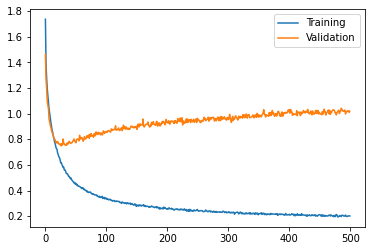

In [12]:
from matplotlib import pyplot
# learning curves of model accuracy
pyplot.plot(history.history['loss'], label='Training')
pyplot.plot(history.history['val_loss'], label='Validation')
pyplot.legend()
pyplot.show()

In [14]:
score = model.evaluate(X_test, Y_test)
print()
print('Test accuracy: ', score[1])

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================


Test accuracy:  0.736
